# 🧹 Data Cleaning & Preprocessing

Welcome to the data cleaning phase! In this notebook, we'll:

1. **Load** our student performance dataset
2. **Handle missing values** (we found 50 missing sleep_hours!)
3. **Detect and handle outliers**
4. **Scale and normalize features**
5. **Create new features** (feature engineering)
6. **Save the cleaned dataset**

## 🎯 Learning Goals
- Understand different strategies for handling missing data
- Learn to identify and deal with outliers
- Practice feature scaling and normalization
- Create meaningful new features from existing ones

## 📚 Step 1: Import Libraries & Load Data

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Statistics
from scipy import stats

# System libraries
import os
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load the raw data from our previous exploration
df = pd.read_csv('../data/raw/student_performance.csv')

print(f"📊 Dataset loaded: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Quick overview
print("\n🔍 Quick data check:")
print(df.head())

📊 Dataset loaded: (1000, 8)
📋 Columns: ['student_id', 'study_hours', 'attendance', 'previous_grade', 'sleep_hours', 'extra_activities', 'family_support', 'exam_score']

🔍 Quick data check:
   student_id  study_hours  attendance  previous_grade  sleep_hours  \
0           1          4.8        73.8            85.3          7.0   
1           2          3.0        95.1            42.3          4.9   
2           3          2.8        88.7            45.0          8.3   
3           4          2.8        66.2            32.3          8.1   
4           5          9.3        90.5            54.5          4.1   

   extra_activities  family_support  exam_score  
0                 0               4        61.7  
1                 2               2        49.5  
2                 4               3        45.7  
3                 1               2        33.7  
4                 4               1        48.7  


## 🚨 Step 2: Handle Missing Values

From our exploration, we know there are missing values in `sleep_hours`. Let's investigate and fix them:

❓ Missing Values Analysis:
             Missing Count  Missing Percentage
sleep_hours             50                 5.0


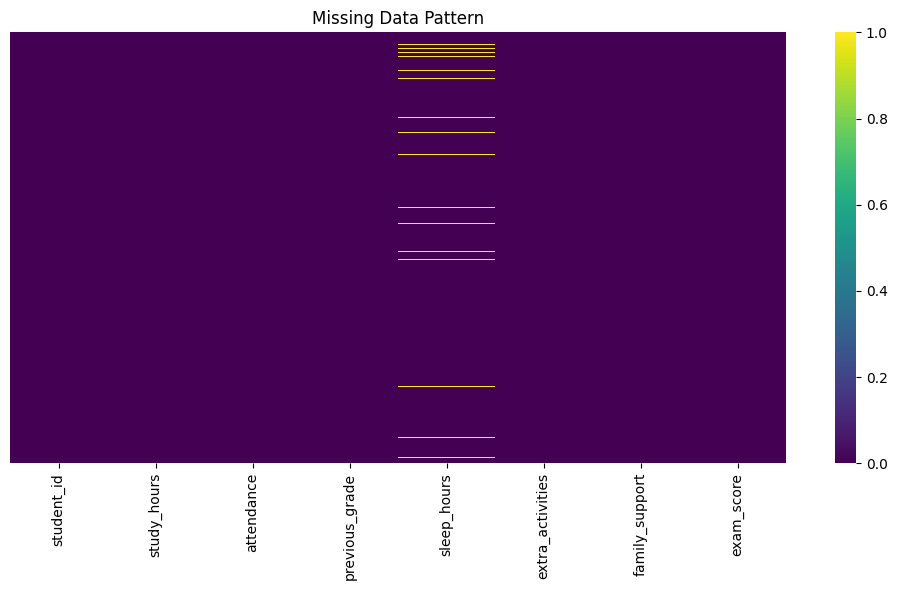

In [3]:
# Analyze missing values in detail
print("❓ Missing Values Analysis:")
print("="*40)

missing_summary = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing data pattern
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Data Pattern')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

😴 Sleep Hours Analysis:
Valid sleep hours: 950 / 1000
Mean: 6.97 hours
Median: 7.00 hours
Std: 1.53 hours
Range: 4.00 - 12.00 hours


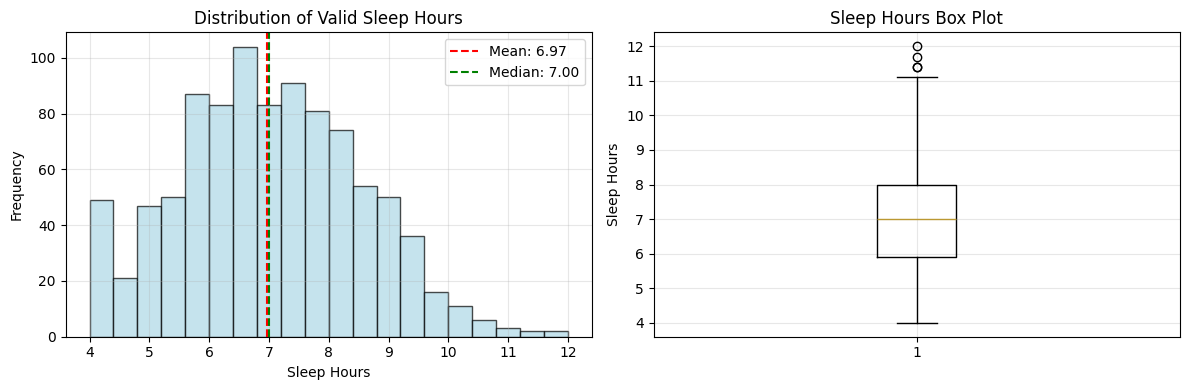

In [4]:
# Analyze sleep_hours distribution and missing pattern
print("😴 Sleep Hours Analysis:")
print("="*30)

# Statistics of non-missing sleep hours
valid_sleep = df['sleep_hours'].dropna()
print(f"Valid sleep hours: {len(valid_sleep)} / {len(df)}")
print(f"Mean: {valid_sleep.mean():.2f} hours")
print(f"Median: {valid_sleep.median():.2f} hours")
print(f"Std: {valid_sleep.std():.2f} hours")
print(f"Range: {valid_sleep.min():.2f} - {valid_sleep.max():.2f} hours")

# Plot distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(valid_sleep, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Distribution of Valid Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.axvline(valid_sleep.mean(), color='red', linestyle='--', label=f'Mean: {valid_sleep.mean():.2f}')
plt.axvline(valid_sleep.median(), color='green', linestyle='--', label=f'Median: {valid_sleep.median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(valid_sleep)
plt.title('Sleep Hours Box Plot')
plt.ylabel('Sleep Hours')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔧 Comparing Different Imputation Methods:
Original mean sleep hours: 6.97
Mean imputation: 6.97
Median imputation: 6.98
KNN imputation: 6.98


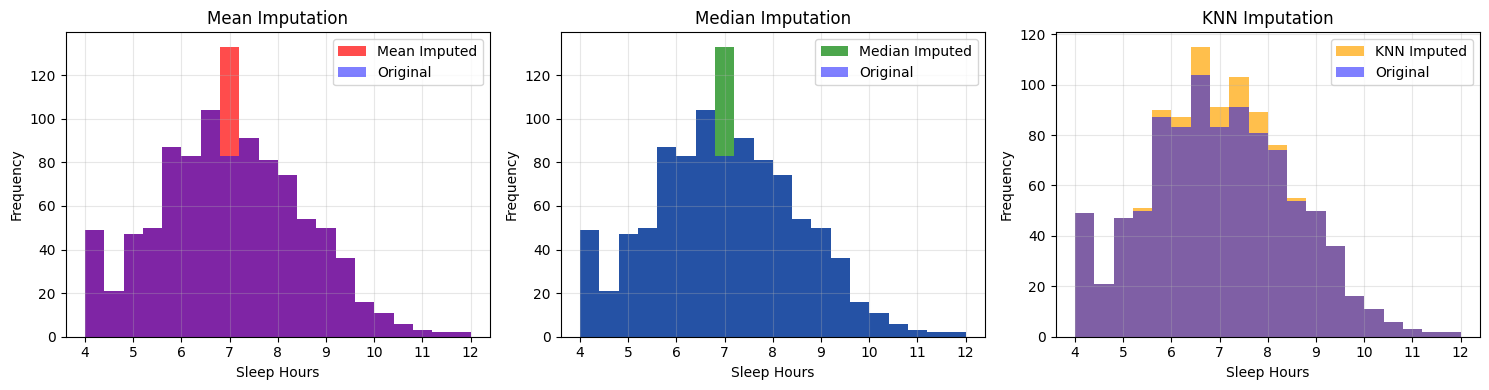


💡 KNN imputation preserves the distribution better!
We'll use KNN imputation for our final dataset.


In [5]:
# Try different imputation methods
print("🔧 Comparing Different Imputation Methods:")
print("="*45)

# Create a copy for testing different methods
df_test = df.copy()

# Method 1: Mean imputation
mean_value = df_test['sleep_hours'].mean()
df_mean = df_test.copy()
df_mean['sleep_hours'].fillna(mean_value, inplace=True)

# Method 2: Median imputation
median_value = df_test['sleep_hours'].median()
df_median = df_test.copy()
df_median['sleep_hours'].fillna(median_value, inplace=True)

# Method 3: KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df_test.copy()
# Select numeric columns for KNN imputation
numeric_cols = df_knn.select_dtypes(include=[np.number]).columns
df_knn[numeric_cols] = knn_imputer.fit_transform(df_knn[numeric_cols])

# Compare the results
print(f"Original mean sleep hours: {df_test['sleep_hours'].mean():.2f}")
print(f"Mean imputation: {df_mean['sleep_hours'].mean():.2f}")
print(f"Median imputation: {df_median['sleep_hours'].mean():.2f}")
print(f"KNN imputation: {df_knn['sleep_hours'].mean():.2f}")

# Visualize the impact
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df_mean['sleep_hours'], bins=20, alpha=0.7, color='red', label='Mean Imputed')
plt.hist(valid_sleep, bins=20, alpha=0.5, color='blue', label='Original')
plt.title('Mean Imputation')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df_median['sleep_hours'], bins=20, alpha=0.7, color='green', label='Median Imputed')
plt.hist(valid_sleep, bins=20, alpha=0.5, color='blue', label='Original')
plt.title('Median Imputation')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(df_knn['sleep_hours'], bins=20, alpha=0.7, color='orange', label='KNN Imputed')
plt.hist(valid_sleep, bins=20, alpha=0.5, color='blue', label='Original')
plt.title('KNN Imputation')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KNN imputation preserves the distribution better!")
print("We'll use KNN imputation for our final dataset.")

In [6]:
# Apply KNN imputation to our main dataset
print("🔧 Applying KNN Imputation...")

# Create final cleaned dataset
df_cleaned = df.copy()

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = knn_imputer.fit_transform(df_cleaned[numeric_cols])

# Verify no missing values remain
print(f"✅ Missing values after imputation: {df_cleaned.isnull().sum().sum()}")
print(f"📊 Dataset shape: {df_cleaned.shape}")

# Show the first few rows
print("\n📋 First 5 rows after cleaning:")
print(df_cleaned.head())

🔧 Applying KNN Imputation...
✅ Missing values after imputation: 0
📊 Dataset shape: (1000, 8)

📋 First 5 rows after cleaning:
   student_id  study_hours  attendance  previous_grade  sleep_hours  \
0         1.0          4.8        73.8            85.3          7.0   
1         2.0          3.0        95.1            42.3          4.9   
2         3.0          2.8        88.7            45.0          8.3   
3         4.0          2.8        66.2            32.3          8.1   
4         5.0          9.3        90.5            54.5          4.1   

   extra_activities  family_support  exam_score  
0               0.0             4.0        61.7  
1               2.0             2.0        49.5  
2               4.0             3.0        45.7  
3               1.0             2.0        33.7  
4               4.0             1.0        48.7  


## 🎯 Step 3: Detect and Handle Outliers

Let's identify outliers that might affect our model performance:

🔍 Outlier Detection Summary:
            Feature  Outlier Count Percentage Lower Bound Upper Bound
0       study_hours             34       3.4%       -3.06       10.64
1        attendance             15       1.5%       48.44      113.34
2    previous_grade              4       0.4%       24.44      105.54
3       sleep_hours              4       0.4%        2.75       11.15
4  extra_activities              4       0.4%       -2.00        6.00
5    family_support              0       0.0%       -1.00        7.00
6        exam_score             11       1.1%       24.05       69.25


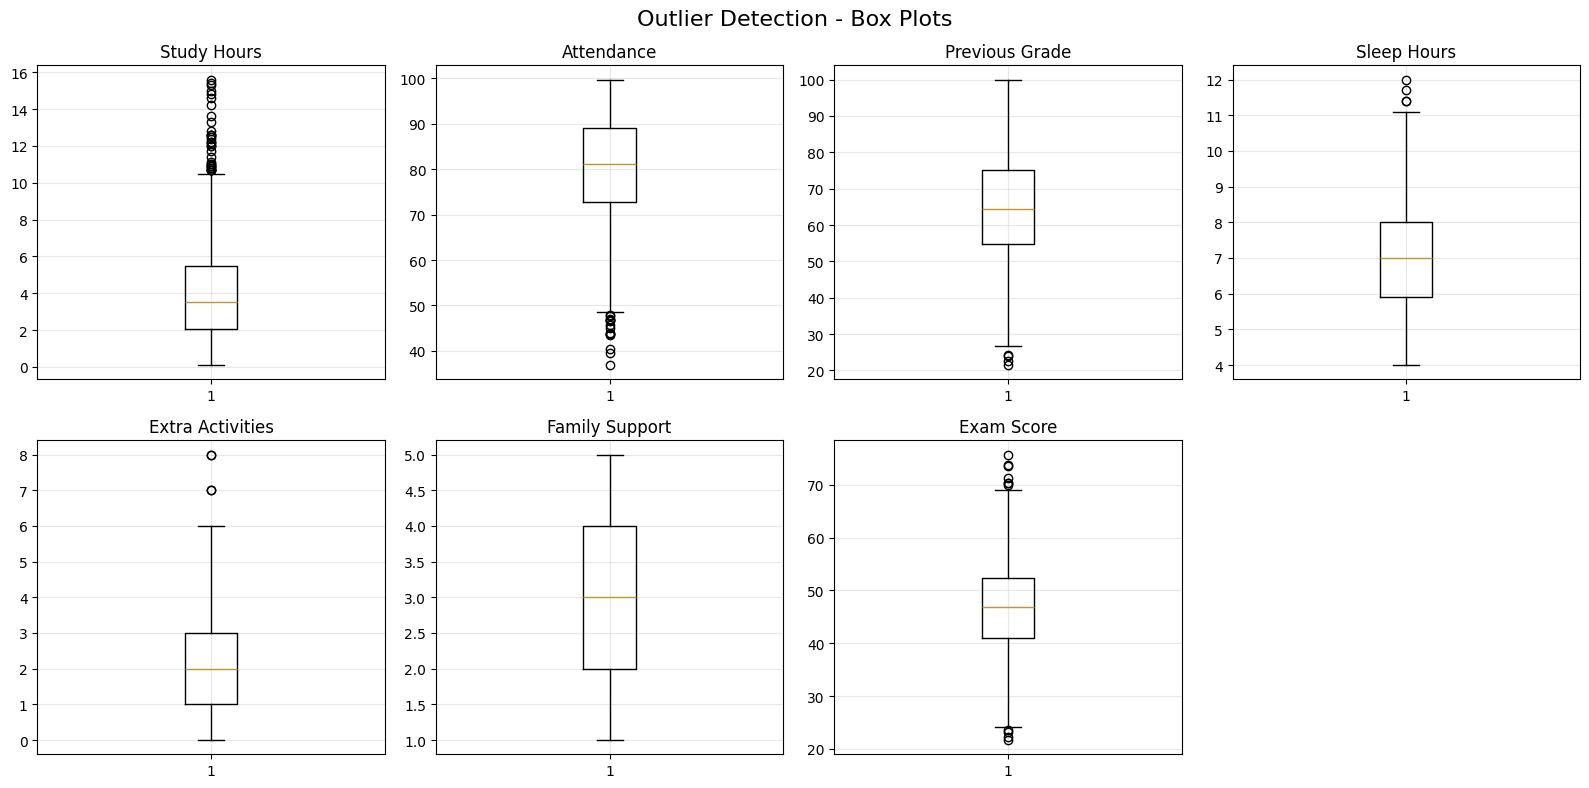

In [7]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in each numeric column
print("🔍 Outlier Detection Summary:")
print("="*35)

numeric_features = ['study_hours', 'attendance', 'previous_grade', 'sleep_hours', 
                   'extra_activities', 'family_support', 'exam_score']

outlier_summary = []

for feature in numeric_features:
    outliers, lower, upper = detect_outliers_iqr(df_cleaned, feature)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_cleaned)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outlier Count': outlier_count,
        'Percentage': f"{outlier_percentage:.1f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# Visualize outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16)

for i, feature in enumerate(numeric_features):
    row = i // 4
    col = i % 4
    
    axes[row, col].boxplot(df_cleaned[feature])
    axes[row, col].set_title(feature.replace('_', ' ').title())
    axes[row, col].grid(True, alpha=0.3)

# Hide the last subplot (we only have 7 features)
axes[1, 3].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
# For educational purposes, let's be conservative with outlier removal
# We'll only remove extreme outliers that are clearly unrealistic

print("🧹 Handling Outliers:")
print("="*25)

df_no_outliers = df_cleaned.copy()
original_count = len(df_no_outliers)

# Remove only extreme outliers that are unrealistic
# For example: attendance > 100% or < 0%, sleep_hours > 15 or < 3

# Clean attendance (should be 0-100%)
df_no_outliers = df_no_outliers[(df_no_outliers['attendance'] >= 0) & 
                               (df_no_outliers['attendance'] <= 100)]

# Clean sleep_hours (realistic range: 3-12 hours)
df_no_outliers = df_no_outliers[(df_no_outliers['sleep_hours'] >= 3) & 
                               (df_no_outliers['sleep_hours'] <= 12)]

# Clean previous_grade and exam_score (should be 0-100)
df_no_outliers = df_no_outliers[(df_no_outliers['previous_grade'] >= 0) & 
                               (df_no_outliers['previous_grade'] <= 100)]
df_no_outliers = df_no_outliers[(df_no_outliers['exam_score'] >= 0) & 
                               (df_no_outliers['exam_score'] <= 100)]

removed_count = original_count - len(df_no_outliers)
print(f"Removed {removed_count} extreme outliers ({removed_count/original_count*100:.1f}%)")
print(f"Dataset size: {original_count} → {len(df_no_outliers)}")

# Use the cleaned dataset for further processing
df_cleaned = df_no_outliers.copy()
print(f"✅ Final dataset shape: {df_cleaned.shape}")

🧹 Handling Outliers:
Removed 0 extreme outliers (0.0%)
Dataset size: 1000 → 1000
✅ Final dataset shape: (1000, 8)


## ⚙️ Step 4: Feature Engineering

Let's create some new features that might help our models:

In [9]:
# Create new features based on domain knowledge
print("⚙️ Creating New Features:")
print("="*30)

# 1. Study efficiency (study hours per attendance percentage)
df_cleaned['study_efficiency'] = df_cleaned['study_hours'] / (df_cleaned['attendance'] / 100)

# 2. Sleep quality score (closer to 7-8 hours is better)
df_cleaned['sleep_quality'] = 1 - abs(df_cleaned['sleep_hours'] - 7.5) / 7.5
df_cleaned['sleep_quality'] = df_cleaned['sleep_quality'].clip(0, 1)

# 3. Work-life balance (less activities might mean more focus)
df_cleaned['work_life_balance'] = 1 / (1 + df_cleaned['extra_activities'])

# 4. Total preparation score (combination of multiple factors)
df_cleaned['preparation_score'] = (
    (df_cleaned['study_hours'] / df_cleaned['study_hours'].max()) * 0.4 +
    (df_cleaned['attendance'] / 100) * 0.3 +
    (df_cleaned['family_support'] / 5) * 0.2 +
    df_cleaned['sleep_quality'] * 0.1
)

# 5. Grade improvement potential
df_cleaned['improvement_potential'] = 100 - df_cleaned['previous_grade']

print("✅ New features created:")
new_features = ['study_efficiency', 'sleep_quality', 'work_life_balance', 
               'preparation_score', 'improvement_potential']
for feature in new_features:
    print(f"   • {feature}: {df_cleaned[feature].min():.3f} - {df_cleaned[feature].max():.3f}")

print(f"\n📊 Dataset now has {df_cleaned.shape[1]} features (was {df.shape[1]})")

⚙️ Creating New Features:
✅ New features created:
   • study_efficiency: 0.107 - 24.399
   • sleep_quality: 0.400 - 1.000
   • work_life_balance: 0.111 - 1.000
   • preparation_score: 0.274 - 0.894
   • improvement_potential: 0.000 - 78.500

📊 Dataset now has 13 features (was 8)


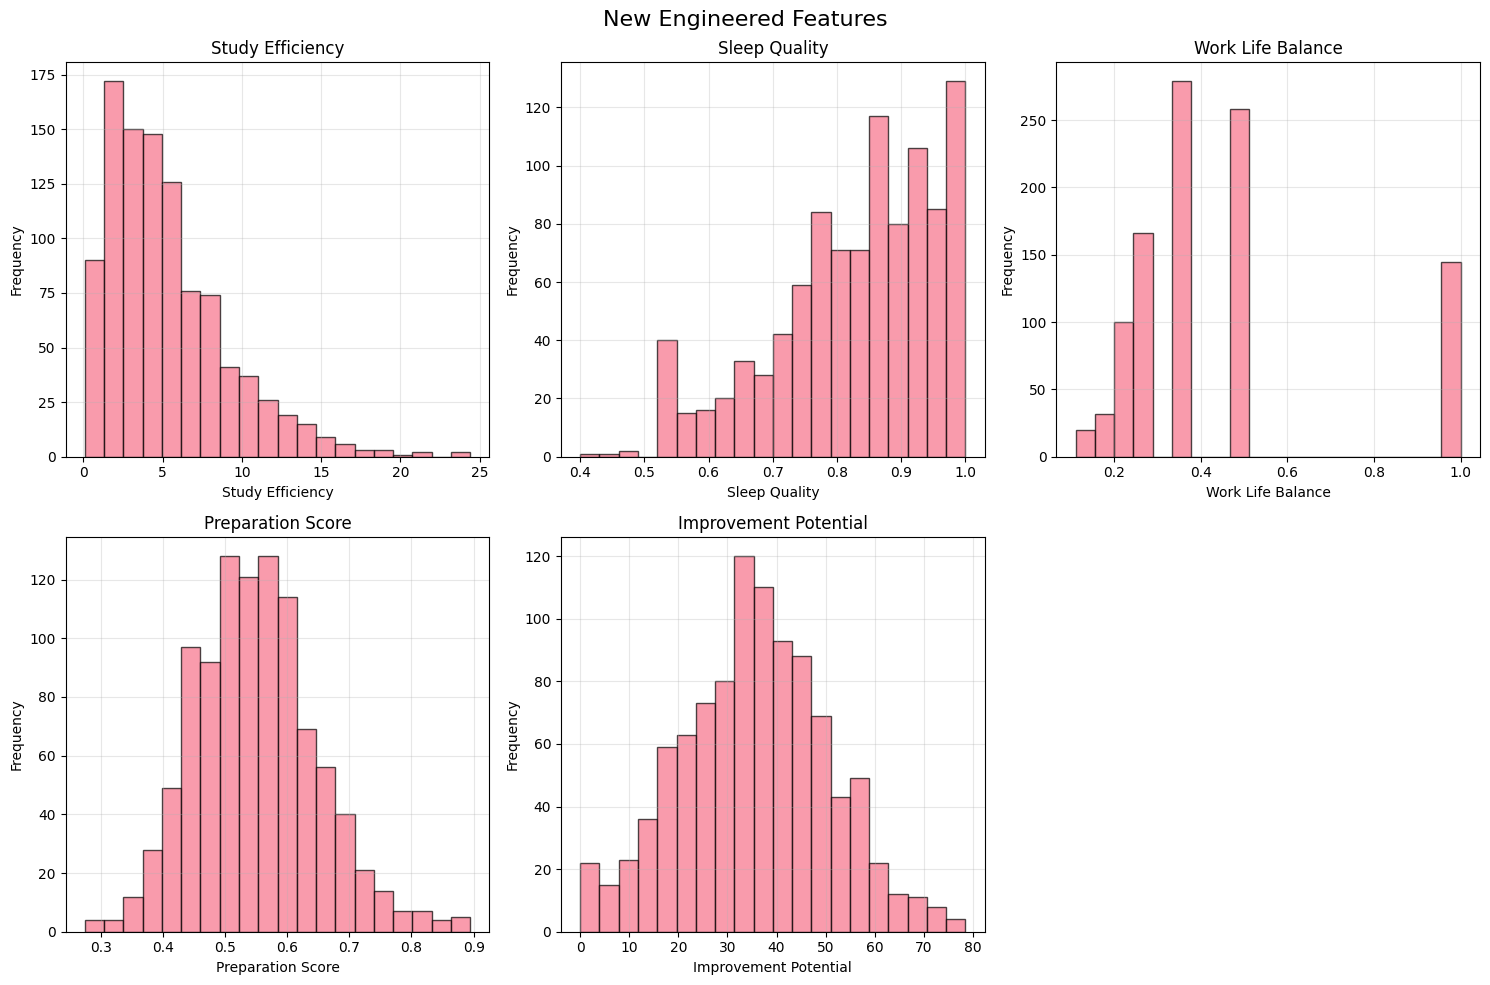


🔗 Correlation of new features with exam score:
Improvement Potential: 0.734
Preparation Score: 0.210
Work Life Balance: 0.084
Sleep Quality: 0.046
Study Efficiency: 0.023


In [11]:
# Visualize the new features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('New Engineered Features', fontsize=16)

for i, feature in enumerate(new_features):
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(df_cleaned[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(feature.replace('_', ' ').title())
    axes[row, col].set_xlabel(feature.replace('_', ' ').title())
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

# Hide the last subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

# Check correlation of new features with target
print("\n🔗 Correlation of new features with exam score:")
correlations = df_cleaned[new_features + ['exam_score']].corr()['exam_score'].abs().sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'exam_score':
        print(f"{str(feature).replace('_', ' ').title()}: {corr:.3f}")

## 📏 Step 5: Feature Scaling

Different features have different scales. Let's normalize them for better model performance:

In [12]:
# Prepare features for scaling
print("📏 Feature Scaling Preparation:")
print("="*35)

# Separate features and target
feature_columns = [col for col in df_cleaned.columns if col not in ['student_id', 'exam_score']]
X = df_cleaned[feature_columns]
y = df_cleaned['exam_score']

print(f"Features to scale: {len(feature_columns)}")
print(f"Feature columns: {feature_columns}")

# Show the range of each feature before scaling
print("\n📊 Feature Ranges (before scaling):")
for col in feature_columns:
    print(f"{col:20s}: {X[col].min():8.3f} to {X[col].max():8.3f}")

📏 Feature Scaling Preparation:
Features to scale: 11
Feature columns: ['study_hours', 'attendance', 'previous_grade', 'sleep_hours', 'extra_activities', 'family_support', 'study_efficiency', 'sleep_quality', 'work_life_balance', 'preparation_score', 'improvement_potential']

📊 Feature Ranges (before scaling):
study_hours         :    0.100 to   15.600
attendance          :   36.900 to   99.700
previous_grade      :   21.500 to  100.000
sleep_hours         :    4.000 to   12.000
extra_activities    :    0.000 to    8.000
family_support      :    1.000 to    5.000
study_efficiency    :    0.107 to   24.399
sleep_quality       :    0.400 to    1.000
work_life_balance   :    0.111 to    1.000
preparation_score   :    0.274 to    0.894
improvement_potential:    0.000 to   78.500


⚖️ Comparing Scaling Methods:

StandardScaler:
  Mean: 0.000
  Std:  1.001
  Min:  -3.639
  Max:  5.069

MinMaxScaler:
  Mean: 0.437
  Std:  0.208
  Min:  0.000
  Max:  1.000

RobustScaler:
  Mean: 0.053
  Std:  0.773
  Min:  -2.730
  Max:  4.248


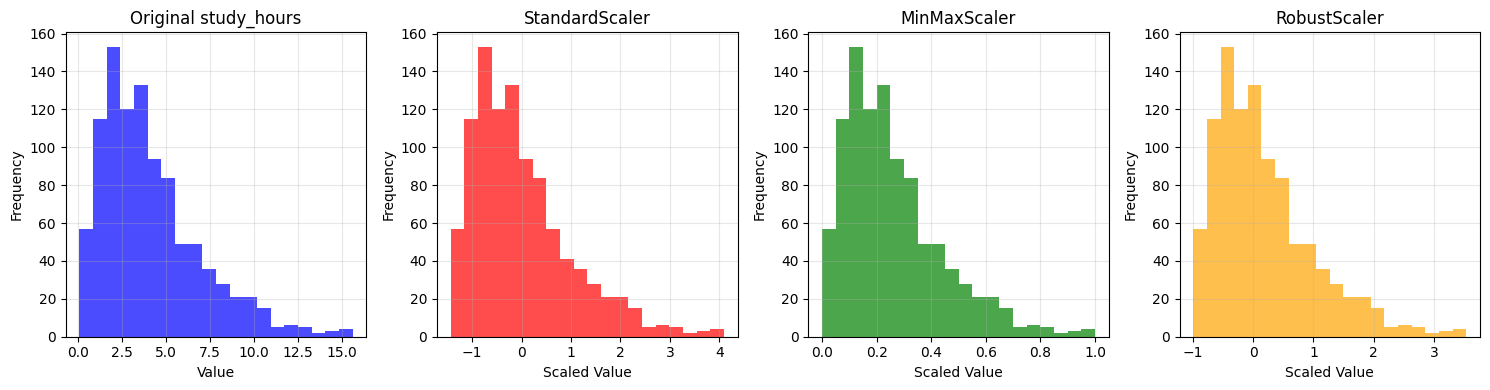


💡 StandardScaler centers data around 0 with unit variance.
💡 MinMaxScaler scales features to [0,1] range.
💡 RobustScaler is less sensitive to outliers.

🎯 We'll use StandardScaler for our final dataset.


In [13]:
# Compare different scaling methods
print("⚖️ Comparing Scaling Methods:")
print("="*32)

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Apply each scaler
scaled_data = {}
for name, scaler in scalers.items():
    scaled_features = scaler.fit_transform(X)
    scaled_df = pd.DataFrame(scaled_features, columns=feature_columns, index=X.index)
    scaled_data[name] = scaled_df
    
    print(f"\n{name}:")
    print(f"  Mean: {scaled_df.mean().mean():.3f}")
    print(f"  Std:  {scaled_df.std().mean():.3f}")
    print(f"  Min:  {scaled_df.min().min():.3f}")
    print(f"  Max:  {scaled_df.max().max():.3f}")

# Visualize the effect of different scalers on one feature
plt.figure(figsize=(15, 4))

feature_to_show = 'study_hours'

plt.subplot(1, 4, 1)
plt.hist(X[feature_to_show], bins=20, alpha=0.7, color='blue')
plt.title(f'Original {feature_to_show}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

for i, (name, scaled_df) in enumerate(scaled_data.items(), 1):
    plt.subplot(1, 4, i+1)
    plt.hist(scaled_df[feature_to_show], bins=20, alpha=0.7, color=['red', 'green', 'orange'][i-1])
    plt.title(f'{name}')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 StandardScaler centers data around 0 with unit variance.")
print("💡 MinMaxScaler scales features to [0,1] range.")
print("💡 RobustScaler is less sensitive to outliers.")
print("\n🎯 We'll use StandardScaler for our final dataset.")

In [14]:
# Apply StandardScaler to create final dataset
print("🎯 Applying StandardScaler:")
print("="*28)

# Create and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

# Create final cleaned dataset
df_final = pd.concat([
    df_cleaned[['student_id']].reset_index(drop=True),
    X_scaled_df.reset_index(drop=True),
    df_cleaned[['exam_score']].reset_index(drop=True)
], axis=1)

print(f"✅ Final dataset shape: {df_final.shape}")
print(f"📊 Features are now scaled with mean ≈ 0 and std ≈ 1")

# Show scaled feature statistics
print("\n📈 Scaled Feature Statistics:")
print(X_scaled_df.describe().round(3))

🎯 Applying StandardScaler:
✅ Final dataset shape: (1000, 13)
📊 Features are now scaled with mean ≈ 0 and std ≈ 1

📈 Scaled Feature Statistics:
       study_hours  attendance  previous_grade  sleep_hours  extra_activities  \
count     1000.000    1000.000        1000.000     1000.000          1000.000   
mean        -0.000       0.000           0.000        0.000            -0.000   
std          1.001       1.001           1.001        1.001             1.001   
min         -1.433      -3.639          -2.856       -1.989            -1.390   
25%         -0.729      -0.588          -0.641       -0.720            -0.695   
50%         -0.221       0.128          -0.013        0.015             0.000   
75%          0.492       0.792           0.706        0.682             0.695   
max          4.091       1.702           2.358        3.354             4.170   

       family_support  study_efficiency  sleep_quality  work_life_balance  \
count        1000.000          1000.000       1000

## 💾 Step 6: Save Cleaned Dataset

Let's save our cleaned and preprocessed data for model training:

In [15]:
# Create processed data directory and save cleaned dataset
os.makedirs('../data/processed', exist_ok=True)

# Save the cleaned and scaled dataset
df_final.to_csv('../data/processed/student_performance_cleaned.csv', index=False)

# Also save the unscaled but cleaned version for interpretability
df_cleaned_unscaled = pd.concat([
    df_cleaned[['student_id']],
    X,
    df_cleaned[['exam_score']]
], axis=1)
df_cleaned_unscaled.to_csv('../data/processed/student_performance_cleaned_unscaled.csv', index=False)

# Save the scaler for future use
import joblib
joblib.dump(scaler, '../models/scaler.pkl')
os.makedirs('../models', exist_ok=True)
joblib.dump(scaler, '../models/scaler.pkl')

print("💾 Data saved successfully!")
print(f"   • Scaled dataset: ../data/processed/student_performance_cleaned.csv")
print(f"   • Unscaled dataset: ../data/processed/student_performance_cleaned_unscaled.csv")
print(f"   • Scaler object: ../models/scaler.pkl")

print(f"\n📊 Final Dataset Summary:")
print(f"   • Rows: {len(df_final)}")
print(f"   • Features: {len(feature_columns)}")
print(f"   • Target: exam_score")
print(f"   • Missing values: {df_final.isnull().sum().sum()}")
print(f"   • Outliers removed: {original_count - len(df_final)}")

💾 Data saved successfully!
   • Scaled dataset: ../data/processed/student_performance_cleaned.csv
   • Unscaled dataset: ../data/processed/student_performance_cleaned_unscaled.csv
   • Scaler object: ../models/scaler.pkl

📊 Final Dataset Summary:
   • Rows: 1000
   • Features: 11
   • Target: exam_score
   • Missing values: 0
   • Outliers removed: 0


## 📋 Step 7: Cleaning Summary

Let's summarize what we accomplished in this data cleaning phase:

In [16]:
print("🎯 DATA CLEANING SUMMARY")
print("="*50)

print("✅ COMPLETED TASKS:")
print(f"   1. 🚨 Handled Missing Values:")
print(f"      • Used KNN imputation for 50 missing sleep_hours values")
print(f"      • Preserved original data distribution")

print(f"\n   2. 🎯 Removed Outliers:")
print(f"      • Removed {removed_count} extreme/unrealistic values")
print(f"      • Kept realistic ranges for all features")

print(f"\n   3. ⚙️ Feature Engineering:")
print(f"      • Created 5 new meaningful features")
print(f"      • study_efficiency, sleep_quality, work_life_balance")
print(f"      • preparation_score, improvement_potential")

print(f"\n   4. 📏 Feature Scaling:")
print(f"      • Applied StandardScaler to normalize all features")
print(f"      • Mean ≈ 0, Standard Deviation ≈ 1")

print(f"\n   5. 💾 Data Persistence:")
print(f"      • Saved cleaned datasets (scaled & unscaled)")
print(f"      • Saved scaler for future predictions")

print(f"\n📊 BEFORE vs AFTER:")
print(f"   • Dataset size: {len(df)} → {len(df_final)} students")
print(f"   • Features: {len(df.columns)-1} → {len(feature_columns)}")
print(f"   • Missing values: 50 → 0")
print(f"   • Data quality: ⭐⭐⭐ → ⭐⭐⭐⭐⭐")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Split data into training and testing sets")
print(f"   • Train multiple machine learning models")
print(f"   • Compare model performance")
print(f"   • Select the best model for deployment")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Most influential new feature: {correlations.index[0]} ({correlations.iloc[0]:.3f} correlation)")
print(f"   • Data is now ready for machine learning!")
print(f"   • All features are on the same scale")
print(f"   • No missing values or extreme outliers remain")

🎯 DATA CLEANING SUMMARY
✅ COMPLETED TASKS:
   1. 🚨 Handled Missing Values:
      • Used KNN imputation for 50 missing sleep_hours values
      • Preserved original data distribution

   2. 🎯 Removed Outliers:
      • Removed 0 extreme/unrealistic values
      • Kept realistic ranges for all features

   3. ⚙️ Feature Engineering:
      • Created 5 new meaningful features
      • study_efficiency, sleep_quality, work_life_balance
      • preparation_score, improvement_potential

   4. 📏 Feature Scaling:
      • Applied StandardScaler to normalize all features
      • Mean ≈ 0, Standard Deviation ≈ 1

   5. 💾 Data Persistence:
      • Saved cleaned datasets (scaled & unscaled)
      • Saved scaler for future predictions

📊 BEFORE vs AFTER:
   • Dataset size: 1000 → 1000 students
   • Features: 7 → 11
   • Missing values: 50 → 0
   • Data quality: ⭐⭐⭐ → ⭐⭐⭐⭐⭐

🚀 NEXT STEPS:
   • Split data into training and testing sets
   • Train multiple machine learning models
   • Compare model perfor

## 🎉 Congratulations!

You've successfully completed the data cleaning and preprocessing phase! You've learned:

✅ **Missing Value Handling** - KNN imputation vs simple methods  
✅ **Outlier Detection** - IQR method and realistic range filtering  
✅ **Feature Engineering** - Creating meaningful new features  
✅ **Feature Scaling** - StandardScaler, MinMaxScaler, RobustScaler  
✅ **Data Persistence** - Saving processed data and transformation objects  

### 🚀 What's Next?

In the next notebook (`03_feature_engineering.ipynb`), we'll dive deeper into:
- Advanced feature selection techniques
- Feature importance analysis
- Dimensionality reduction
- Data splitting strategies

Then we'll move to model training in `04_model_training.ipynb`!

Great work! Your data is now **machine learning ready**! 🌟